In [225]:
import numpy as np 
import pandas as pd 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn import preprocessing

In [226]:
# loading dataset
dataset = pd.read_csv("C:/Users/23223/OneDrive/Desktop/research/ETA/dataset/FinalDataset.csv")
dataset.head()

,center,d_lat,d_long,distance,humadity,wind speed,propeller_size,max_speed,altitude,weight,ETA
0,1,6.941162,79.99367,1130,50,1.0,1,1.5,50,100,1130.945333
1,1,6.939394,79.99892,1670,55,2.0,1,1.5,50,150,1523.703030
2,1,6.937818,79.99546,1210,58,3.0,1,1.5,50,125,1124.564475
3,1,6.935539,79.99040,630,49,3.0,1,1.5,50,130,649.773905
4,1,6.938670,79.98911,578,51,2.0,1,1.5,50,250,619.764486


In [227]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
center            400 non-null int64
d_lat             400 non-null float64
d_long            400 non-null float64
distance          400 non-null int64
humadity          400 non-null int64
wind speed        400 non-null float64
propeller_size    400 non-null int64
max_speed         400 non-null float64
altitude          400 non-null int64
weight            400 non-null int64
ETA               400 non-null float64
dtypes: float64(5), int64(6)
memory usage: 34.5 KB


In [228]:
 data = dataset[['center',
 'd_lat',
 'd_long',
 'distance',
 'humadity',
 'wind speed',
 'propeller_size',
 'max_speed',
 'altitude',
 'weight',
 'ETA']]


In [229]:
# initialize scaler and fit the dataset
mms = MinMaxScaler()
mms.fit(dataset)
data_transformed = mms.transform(dataset)

In [230]:
# using ebow method to find best num of cluster
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dataset)
    Sum_of_squared_distances.append(km.inertia_)

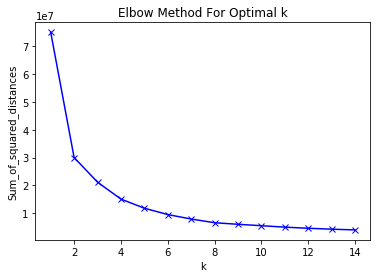

In [231]:
# plot the elbow curwe
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [232]:
# initialize k means cluster
clustering_kmeans = KMeans(n_clusters=2, random_state=0)
data['clusters'] = clustering_kmeans.fit_predict(data)

df = pd.DataFrame(data)
df.to_csv("output.csv",index=False)

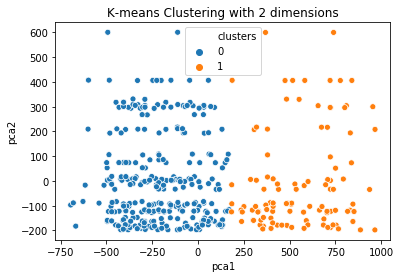

In [233]:
# plot the desribution of dataset according to clusters
reduced_data = PCA(n_components=2).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [234]:
data['clusters'].value_counts()

0    293
1    107
Name: clusters, dtype: int64

In [235]:
dataset.head()

,center,d_lat,d_long,distance,humadity,wind speed,propeller_size,max_speed,altitude,weight,ETA
0,1,6.941162,79.99367,1130,50,1.0,1,1.5,50,100,1130.945333
1,1,6.939394,79.99892,1670,55,2.0,1,1.5,50,150,1523.703030
2,1,6.937818,79.99546,1210,58,3.0,1,1.5,50,125,1124.564475
3,1,6.935539,79.99040,630,49,3.0,1,1.5,50,130,649.773905
4,1,6.938670,79.98911,578,51,2.0,1,1.5,50,250,619.764486


In [236]:
# fit dataset into k means
kmens = clustering_kmeans.fit(dataset)
kmens.predict([[1,6.941162, 79.99367,1130,50,1.0,1,10,50,100,566.4180],[1,6.938670, 79.98911, 578, 51,2.0, 1, 10, 50, 250,351.646]])

array([1, 1])

In [237]:
scalerDS = data.drop('ETA', axis = 1 )
# scalerDS = scalerDS.drop('clusters', axis = 1)
scalerDS

,center,d_lat,d_long,distance,humadity,wind speed,propeller_size,max_speed,altitude,weight,clusters
0,1,6.941162,79.993670,1130,50,1.00,1,1.5,50,100,0
1,1,6.939394,79.998920,1670,55,2.00,1,1.5,50,150,0
2,1,6.937818,79.995460,1210,58,3.00,1,1.5,50,125,0
3,1,6.935539,79.990400,630,49,3.00,1,1.5,50,130,1
4,1,6.938670,79.989110,578,51,2.00,1,1.5,50,250,1
...,...,...,...,...,...,...,...,...,...,...,...
395,1,6.941246,79.983663,1270,49,8.00,1,1.5,50,150,0
396,1,6.944782,79.989413,1050,53,6.90,1,1.5,50,300,0
397,1,6.948531,79.984092,1320,30,7.80,1,1.5,50,352,0
398,1,6.941246,79.982847,592,35,7.10,1,1.5,50,345,1


In [238]:
mms_reg = MinMaxScaler()
mms_reg.fit(scalerDS)

MinMaxScaler()

In [239]:
# export scaler model
import joblib
joblib.dump(mms_reg, 'mms_reg.pkl')

['mms_reg.pkl']

In [240]:
# loding data recprds of cluster one
clusterdDs_1 = data[data.clusters == 0]
clusterdDs_1.head()

,center,d_lat,d_long,distance,humadity,wind speed,propeller_size,max_speed,altitude,weight,ETA,clusters
0,1,6.941162,79.993670,1130,50,1.0,1,1.5,50,100,1130.945333,0
1,1,6.939394,79.998920,1670,55,2.0,1,1.5,50,150,1523.703030,0
2,1,6.937818,79.995460,1210,58,3.0,1,1.5,50,125,1124.564475,0
5,1,6.943207,79.994910,1390,52,1.0,1,1.5,50,240,1352.194658,0
6,1,6.939266,79.998983,1620,53,3.0,1,1.5,50,230,1459.760277,0


In [241]:
X_1 = clusterdDs_1.drop('ETA',axis=1)
Y_1 = clusterdDs_1['ETA']

In [242]:
# transform using scalle
t_X_1 = mms_reg.transform(X_1)

In [243]:
# train test split
xTrain_1, xTest_1, yTrain_1, yTest_1 = train_test_split(t_X_1, Y_1, test_size = 0.30, random_state = 42)

In [244]:
# svr fit
svr_lin_1 = SVR(kernel='linear', C=1e3, gamma= 'auto')
svr_lin_1.fit(xTrain_1, yTrain_1)

SVR(C=1000.0, gamma='auto', kernel='linear')

In [245]:
# svr predict
yPred_1 = svr_lin_1.predict(xTest_1)

In [246]:
yPred_1


array([1240.22750464, 1049.2548036 , 1159.54302308, 1132.21110343,
       1244.09053355,  996.17986064, 1252.87979285, 1139.52997961,
       1105.85933569, 1326.9835728 ,  988.22053766, 1233.36346367,
       1157.05458994,  980.76359377, 1243.53423918, 1359.4151169 ,
       1393.52695598, 1231.98519689, 1335.62088994, 1197.25756259,
       1396.83814452, 1249.00937674, 1188.3885822 ,  991.2862427 ,
       1039.5436885 , 1258.43951381, 1132.86035096, 1066.91479424,
       1080.94036776, 1108.43179852, 1474.64738451, 1365.35805864,
       1317.96051093, 1111.07554361, 1069.06006998, 1032.30456619,
        992.66582596, 1018.2262649 , 1297.78151587, 1297.92825687,
       1048.00690255, 1185.97812245, 1143.81573448, 1209.05934104,
        989.93369803, 1243.8023648 , 1324.22702032, 1268.79752192,
       1025.64564656, 1233.04497038, 1277.8531767 , 1190.87876771,
       1247.7212389 , 1172.4067814 , 1272.62736621, 1015.67384376,
       1079.05905903, 1110.60315648, 1088.52193519, 1297.45277

In [247]:
yTest_1

123    1235.681046
360    1052.444253
79     1141.463470
245    1127.694158
199    1230.970667
          ...     
188    1182.780573
153    1262.557001
286    1280.247024
213    1319.676896
27     1265.127044
Name: ETA, Length: 88, dtype: float64

In [248]:
svr_lin_1.score(xTest_1, yTest_1)

0.9835000516654135

In [249]:
import joblib
joblib.dump(svr_lin_1, 'reg_1.pkl')

['reg_1.pkl']

In [250]:
# export clustering model
import joblib
joblib.dump(kmens, 'Cluster.pkl')

['Cluster.pkl']

In [251]:
# clusted dataset
clusterdDs_2 = data[data.clusters == 1]
clusterdDs_2.head()

,center,d_lat,d_long,distance,humadity,wind speed,propeller_size,max_speed,altitude,weight,ETA,clusters
3,1,6.935539,79.990400,630,49,3.0,1,1.5,50,130,649.773905,1
4,1,6.938670,79.989110,578,51,2.0,1,1.5,50,250,619.764486,1
7,1,6.934346,79.988941,496,50,2.0,1,1.5,50,130,552.266174,1
10,1,6.936838,79.989628,557,53,1.0,1,1.5,50,126,641.056670,1
14,1,6.936796,79.991859,798,41,2.2,1,1.5,50,214,798.026245,1


In [252]:
# divide features and lable
X_2 = clusterdDs_2.drop('ETA',axis=1)
Y_2 = clusterdDs_2['ETA']

In [253]:
# transform dataset
t_X_2 = mms_reg.transform(X_2)

In [254]:
# split dataset
xTrain_2, xTest_2, yTrain_2, yTest_2 = train_test_split(t_X_2, Y_2, test_size = 0.30, random_state = 42)

In [255]:
# svr parameter
svr_lin_2 = SVR(kernel='linear', C=1e3, gamma= 'auto')
svr_lin_2.fit(xTrain_2, yTrain_2)

SVR(C=1000.0, gamma='auto', kernel='linear')

In [259]:
# redict using svr
yPred_2 = svr_lin_2.predict(xTest_2)
xTest_2

array([[0.        , 0.41609857, 0.64543464, 0.07413249, 0.32258065,
        0.94285714, 0.        , 0.        , 1.        , 0.04260652,
        1.        ],
       [0.        , 0.60672232, 0.62004802, 0.13958991, 0.30645161,
        0.04285714, 0.        , 0.        , 1.        , 0.2556391 ,
        1.        ],
       [0.        , 0.50541358, 0.74846409, 0.31230284, 0.17741935,
        0.17142857, 0.        , 0.        , 1.        , 0.20551378,
        1.        ],
       [0.        , 0.431993  , 0.73444672, 0.27839117, 0.17741935,
        0.71428571, 0.        , 0.        , 1.        , 0.13533835,
        1.        ],
       [0.        , 0.40457876, 0.17579973, 0.47949527, 0.        ,
        0.82857143, 0.        , 0.        , 1.        , 0.22807018,
        1.        ],
       [0.        , 0.24381175, 0.3795989 , 0.32413249, 1.        ,
        0.07142857, 0.        , 0.        , 1.        , 0.09398496,
        1.        ],
       [0.        , 0.51120994, 0.61778829, 0.        , 0.

In [257]:
# score of svr
svr_lin_2.score(xTest_2, yTest_2)

0.9927623775396721

In [258]:
# export svr 
import joblib
joblib.dump(svr_lin_2, 'reg_2.pkl')

['reg_2.pkl']